In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Plot results
def plot(images, titles):
    plt.figure(figsize=(20, 5))
    for i in range(len(images)):
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) if len(images[i].shape) == 3 else images[i]
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img_rgb, cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

0.4659745395183563 (132, 243)


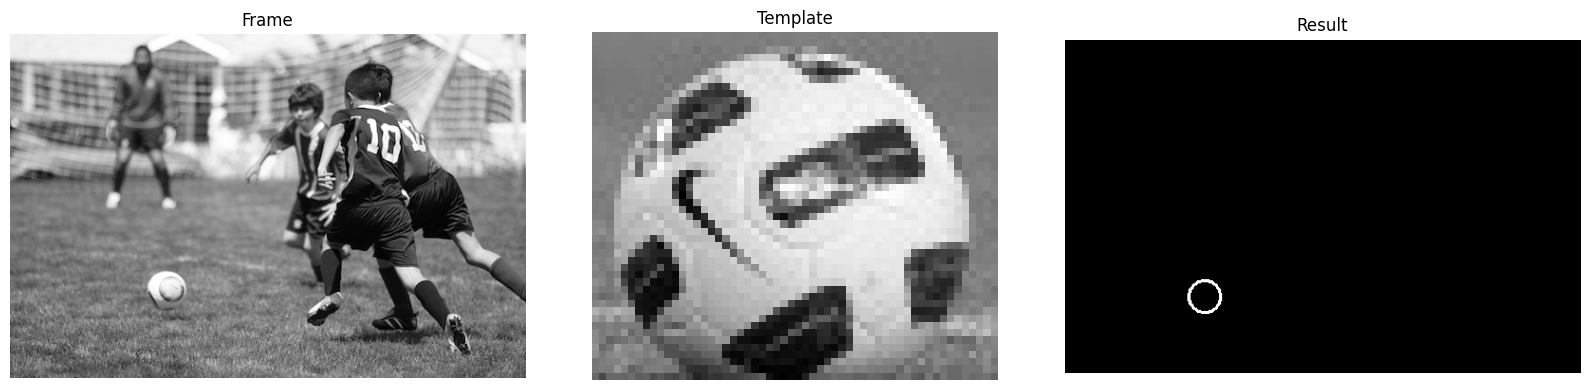

In [2]:
template = cv2.imread('images/template.jpg',0)
frame = cv2.imread("images/players.jpg",0)

result = cv2.matchTemplate(frame, template, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(max_val,max_loc)
cv2.circle(result,max_loc, 15,255,2)

plot([frame, template, result], ['Frame', 'Template', 'Result'])

26


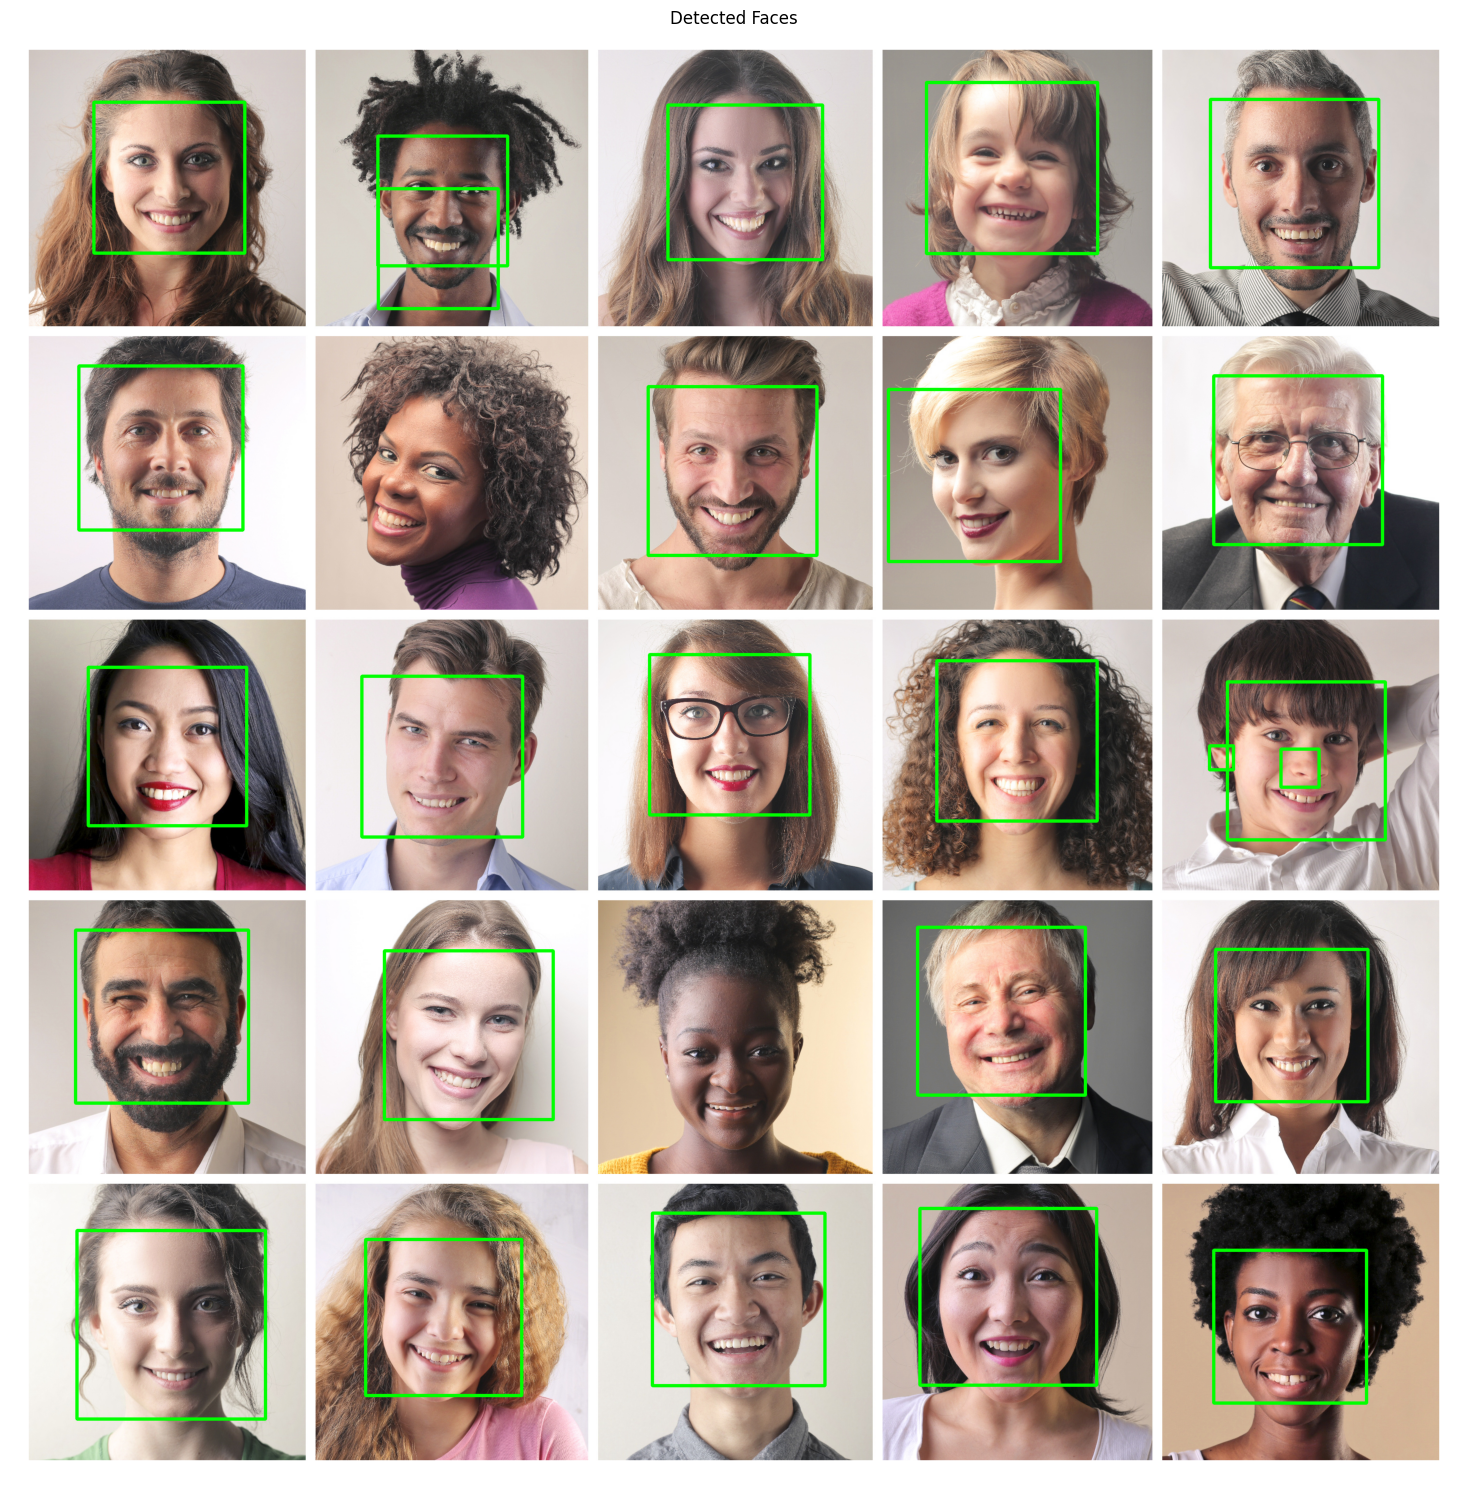

In [14]:
img = cv2.imread("images/faces.jpeg",1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
path = "haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(path)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.10, minNeighbors=5, minSize=(40,40))
print(len(faces))

for (x, y, w, h) in faces:
	cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 5)

plot([img], ['Detected Faces'])

path:  haarcascade_frontalface_default.xml
1


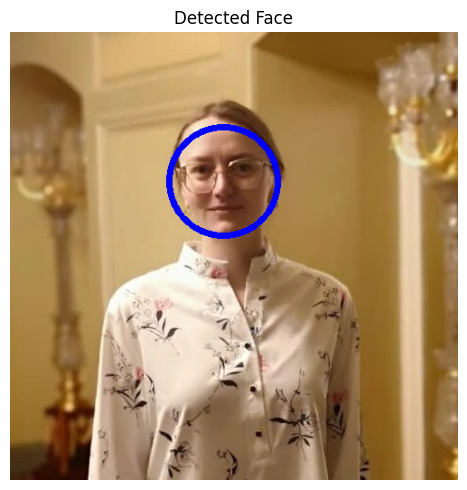

In [30]:
img = cv2.imread("images/woman.jpg",1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
path = "haarcascade_frontalface_default.xml"

print("path: ", path)
eye_cascade = cv2.CascadeClassifier(path)

eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.03,minNeighbors=30,minSize=(10,10))
print(len(eyes))

for (x, y, w, h) in eyes:
	xc = (x + x+w)/2
	yc = (y + y+h)/2
	radius = w/2
	cv2.circle(img, (int(xc),int(yc)), int(radius), (255,0,0), 5)

plot([img], ['Detected Face'])